<a href="https://colab.research.google.com/github/fjadidi2001/DataScienceJourney/blob/master/Copy_of_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Step 1: Load the dataset
dataset = pd.read_csv('/content/drive/My Drive/telematics_syn.csv')

# Step 2: Create the adjusted ClaimYN label
# ClaimYN = 1 if NB_Claim >= 1 and AMT_Claim > 1000, else 0
dataset['ClaimYN'] = ((dataset['NB_Claim'] >= 1) & (dataset['AMT_Claim'] > 1000)).astype(int)

# Step 3: Display the distribution of the new labels
label_distribution = dataset['ClaimYN'].value_counts().sort_index()
label_mapping = {0: 'Not Risky', 1: 'Risky'}
print("\nAdjusted Distribution of ClaimYN Labels:")
for label, count in label_distribution.items():
    print(f"{label_mapping[label]} ({label}): {count} instances")

# Step 4: Save the updated dataset with the new labels
dataset.to_csv('telematics_syn_with_Adjusted_ClaimYN.csv', index=False)


Adjusted Distribution of ClaimYN Labels:
Not Risky (0): 97302 instances
Risky (1): 2698 instances


In [4]:
df = pd.read_csv('telematics_syn_with_Adjusted_ClaimYN.csv')
df.head()

,Duration,Insured.age,Insured.sex,Car.age,Marital,Car.use,Credit.score,Region,Annual.miles.drive,Years.noclaims,...,Left.turn.intensity11,Left.turn.intensity12,Right.turn.intensity08,Right.turn.intensity09,Right.turn.intensity10,Right.turn.intensity11,Right.turn.intensity12,NB_Claim,AMT_Claim,ClaimYN
0,366,45,Male,-1,Married,Commute,609.0,Urban,6213.71,25,...,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1,5100.171753,1
1,182,44,Female,3,Married,Commute,575.0,Urban,12427.42,20,...,24.0,11.0,1099.0,615.0,219.0,101.0,40.0,1,883.554840,0
2,184,48,Female,6,Married,Commute,847.0,Urban,12427.42,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0
3,183,71,Male,6,Married,Private,842.0,Urban,6213.71,43,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.000000,0
4,183,84,Male,10,Married,Private,856.0,Urban,6213.71,65,...,0.0,0.0,325.0,111.0,18.0,4.0,2.0,0,0.000000,0


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Step 4: Preprocess the dataset
# 1. Handle missing values (if any)
dataset.fillna(method='ffill', inplace=True)  # Simple forward fill for missing values

# 2. Encode categorical variables (if any exist)
# Assuming 'CategoryColumn' is a placeholder for actual categorical columns in your dataset
categorical_columns = dataset.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])

# 3. Standardize numerical columns
# Assuming all columns except 'ClaimYN' and the original claims columns are numerical
numerical_columns = dataset.drop(columns=['ClaimYN', 'NB_Claim', 'AMT_Claim']).columns
scaler = StandardScaler()
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

<ipython-input-5-510080e7c0ff>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataset.fillna(method='ffill', inplace=True)  # Simple forward fill for missing values


In [6]:
print(numerical_columns)

Index(['Duration', 'Insured.age', 'Insured.sex', 'Car.age', 'Marital',
       'Car.use', 'Credit.score', 'Region', 'Annual.miles.drive',
       'Years.noclaims', 'Territory', 'Annual.pct.driven',
       'Total.miles.driven', 'Pct.drive.mon', 'Pct.drive.tue', 'Pct.drive.wed',
       'Pct.drive.thr', 'Pct.drive.fri', 'Pct.drive.sat', 'Pct.drive.sun',
       'Pct.drive.2hrs', 'Pct.drive.3hrs', 'Pct.drive.4hrs', 'Pct.drive.wkday',
       'Pct.drive.wkend', 'Pct.drive.rush am', 'Pct.drive.rush pm',
       'Avgdays.week', 'Accel.06miles', 'Accel.08miles', 'Accel.09miles',
       'Accel.11miles', 'Accel.12miles', 'Accel.14miles', 'Brake.06miles',
       'Brake.08miles', 'Brake.09miles', 'Brake.11miles', 'Brake.12miles',
       'Brake.14miles', 'Left.turn.intensity08', 'Left.turn.intensity09',
       'Left.turn.intensity10', 'Left.turn.intensity11',
       'Left.turn.intensity12', 'Right.turn.intensity08',
       'Right.turn.intensity09', 'Right.turn.intensity10',
       'Right.turn.intensity1

In [7]:
print(categorical_columns)

Index(['Insured.sex', 'Marital', 'Car.use', 'Region'], dtype='object')


In [8]:
from imblearn.over_sampling import SMOTE

# Step 5: Handle the imbalance in the dataset
X = dataset.drop(columns=['ClaimYN'])
y = dataset['ClaimYN']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Merging resampled data back into a single DataFrame
dataset_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# Display the new distribution of ClaimYN after resampling
label_distribution_resampled = dataset_resampled['ClaimYN'].value_counts().sort_index()
print("\nResampled Distribution of ClaimYN Labels:")
for label, count in label_distribution_resampled.items():
    print(f"{label_mapping[label]} ({label}): {count} instances")


Resampled Distribution of ClaimYN Labels:
Not Risky (0): 97302 instances
Risky (1): 97302 instances


In [9]:
# Step 6: Drop NB_Claim and AMT_Claim columns
dataset_resampled = dataset_resampled.drop(columns=['NB_Claim', 'AMT_Claim'])

In [10]:
from sklearn.model_selection import train_test_split

# Step 7: Split the dataset into train, test, and validation sets
X = dataset_resampled.drop(columns=['ClaimYN'])
y = dataset_resampled['ClaimYN']

# Split the data (70% train, 15% test, 15% validation)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")
print(f"Validation set size: {len(X_val)}")

Training set size: 136222
Testing set size: 29191
Validation set size: 29191


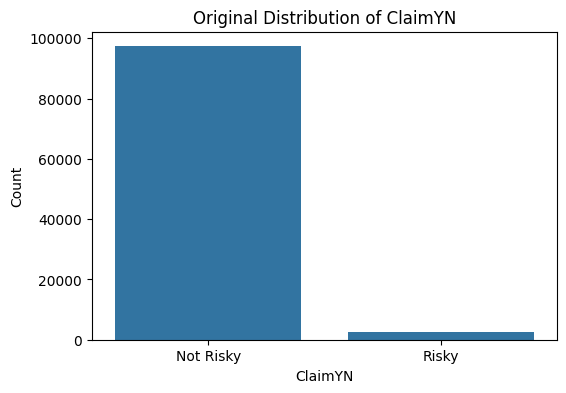

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the original distribution of ClaimYN
plt.figure(figsize=(6, 4))
sns.countplot(x=dataset['ClaimYN'])
plt.title('Original Distribution of ClaimYN')
plt.xlabel('ClaimYN')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Risky', 'Risky'])
plt.show()

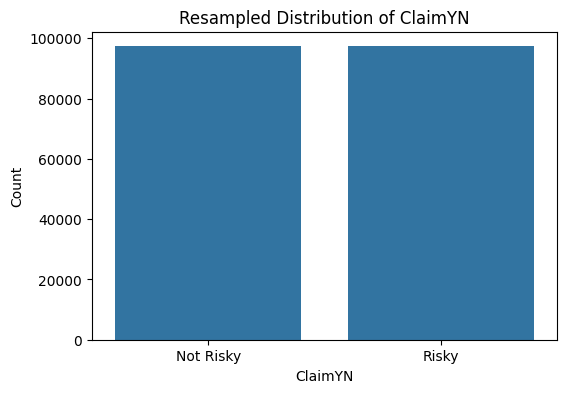

In [ ]:
# Visualize the new distribution of ClaimYN after SMOTE
plt.figure(figsize=(6, 4))
sns.countplot(x=y_resampled)
plt.title('Resampled Distribution of ClaimYN')
plt.xlabel('ClaimYN')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Not Risky', 'Risky'])
plt.show()

In [ ]:
# Visualize pairwise relationships
sns.pairplot(dataset_resampled.sample(500), hue='ClaimYN', diag_kind='kde')
plt.suptitle('Pairwise Relationships in Resampled Data', y=1.02)
plt.show()

In [11]:
!pip install xlstm torch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.4/46.4 kB 1.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [12]:
!pip install pytorch_tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.5 MB/s eta 0:00:00


In [16]:
import xlstm
print(dir(xlstm))

['FeedForwardConfig', 'GatedFeedForward', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', 'blocks', 'components', 'mLSTMBlock', 'mLSTMBlockConfig', 'mLSTMLayer', 'mLSTMLayerConfig', 'sLSTMBlock', 'sLSTMBlockConfig', 'sLSTMLayer', 'sLSTMLayerConfig', 'utils', 'xLSTMBlockStack', 'xLSTMBlockStackConfig', 'xLSTMLMModel', 'xLSTMLMModelConfig', 'xlstm_block_stack', 'xlstm_lm_model']


In [18]:
from xlstm import xlstm_lm_model

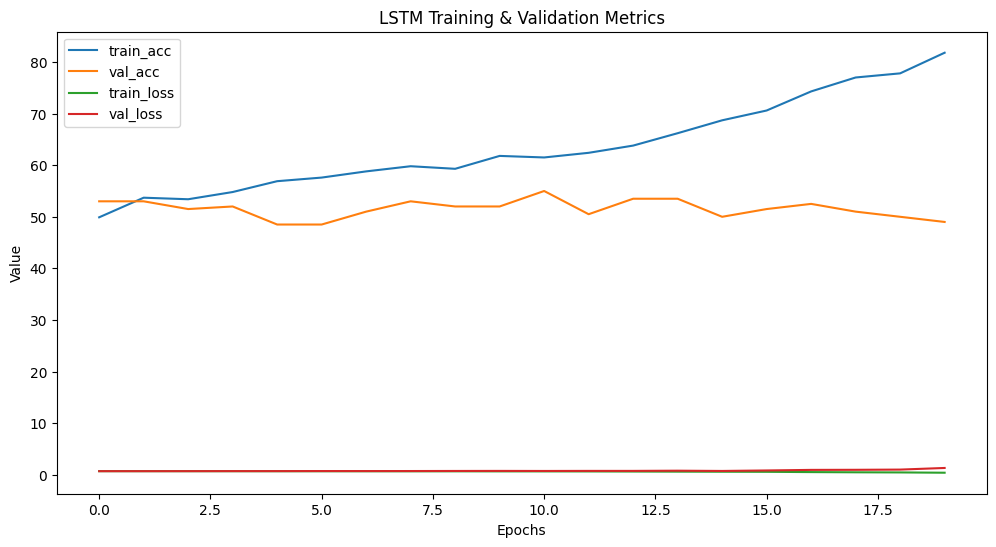

Test Accuracy - LSTM: 0.50


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the LSTM-based Classifier
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        x = self.fc(h_n[-1])
        return x

# Initialize the model, loss function, and optimizer
input_size = 10  # This should be set to the number of features in your input data
hidden_size = 128
num_layers = 2
num_classes = 2

lstm_model = LSTMModel(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, num_classes=num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.001)

# Assume X_train, y_train, X_val, y_val, X_test, y_test are already defined
# Convert data to PyTorch tensors
X_train_tensor = torch.randn(1000, 10, input_size)  # Example data, replace with your actual data
y_train_tensor = torch.randint(0, 2, (1000,))
X_val_tensor = torch.randn(200, 10, input_size)
y_val_tensor = torch.randint(0, 2, (200,))
X_test_tensor = torch.randn(100, 10, input_size)
y_test_tensor = torch.randint(0, 2, (100,))

# Prepare data loaders
train_data = TensorDataset(X_train_tensor, y_train_tensor)
val_data = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64, shuffle=False)

# Training loop
train_acc, val_acc = [], []
train_loss, val_loss = [], []

epochs = 20

for epoch in range(epochs):
    lstm_model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = lstm_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_acc.append(100 * correct / total)
    train_loss.append(running_loss / len(train_loader))

    # Validation
    lstm_model.eval()
    val_loss_total, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = lstm_model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss_total += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    val_acc.append(100 * correct / total)
    val_loss.append(val_loss_total / len(val_loader))

# Plot training and validation accuracy/loss
def plot_metrics(metrics, title):
    plt.figure(figsize=(12, 6))
    for metric_name, values in metrics.items():
        plt.plot(values, label=metric_name)
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

plot_metrics({'train_acc': train_acc, 'val_acc': val_acc, 'train_loss': train_loss, 'val_loss': val_loss}, title="LSTM Training & Validation Metrics")

# Test Accuracy
lstm_model.eval()
with torch.no_grad():
    lstm_test_outputs = lstm_model(X_test_tensor)
    _, lstm_test_preds = torch.max(lstm_test_outputs.data, 1)
    test_acc_lstm = accuracy_score(y_test_tensor.numpy(), lstm_test_preds.numpy())

print(f"Test Accuracy - LSTM: {test_acc_lstm:.2f}")

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from pytorch_tabnet.tab_model import TabNetClassifier
from xlstm import XLSTMClassifier  # Importing XLSTM model

# Load the dataset (assuming dataset_resampled has been created as described earlier)
X = dataset_resampled.drop(columns=['ClaimYN']).values
y = dataset_resampled['ClaimYN'].values

# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Function to plot accuracy and loss
def plot_metrics(history, title="Model Metrics"):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.title(f'{title} Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.title(f'{title} Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

train_acc_log = log_reg.score(X_train, y_train)
val_acc_log = log_reg.score(X_val, y_val)

print(f"Logistic Regression - Training Accuracy: {train_acc_log}, Validation Accuracy: {val_acc_log}")

# Model 2: Random Forest
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

train_acc_rf = random_forest.score(X_train, y_train)
val_acc_rf = random_forest.score(X_val, y_val)

print(f"Random Forest - Training Accuracy: {train_acc_rf}, Validation Accuracy: {val_acc_rf}")

# Model 3: TabNet
tabnet = TabNetClassifier()
tabnet.fit(X_train, y_train, eval_set=[(X_val, y_val)], eval_name=['val'], patience=5, max_epochs=200, batch_size=1024)

train_acc_tabnet = accuracy_score(y_train, tabnet.predict(X_train))
val_acc_tabnet = accuracy_score(y_val, tabnet.predict(X_val))

print(f"TabNet - Training Accuracy: {train_acc_tabnet}, Validation Accuracy: {val_acc_tabnet}")

# Model 4: Convolutional Neural Network (CNN)
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 2)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Preparing data for PyTorch
train_data = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_data = TensorDataset(torch.tensor(X_val, dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = DataLoader(val_data, batch_size=64)

# Training CNN
cnn_model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

train_acc_cnn, val_acc_cnn = [], []
train_loss_cnn, val_loss_cnn = [], []

epochs = 20
for epoch in range(epochs):
    cnn_model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        outputs = cnn_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_acc_cnn.append(100 * correct / total)
    train_loss_cnn.append(running_loss / len(train_loader))

    cnn_model.eval()
    val_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader:
            outputs = cnn_model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    val_acc_cnn.append(100 * correct / total)
    val_loss_cnn.append(val_loss / len(val_loader))

plot_metrics({'train_acc': train_acc_cnn, 'val_acc': val_acc_cnn, 'train_loss': train_loss_cnn, 'val_loss': val_loss_cnn}, title="CNN")

# Model 5: Recurrent Neural Network (RNN)
class RNNModel(nn.Module):
    def __init__(self):
        super(RNNModel, self).__init__()
        self.rnn = nn.LSTM(X_train.shape[1], 128, batch_first=True)
        self.fc = nn.Linear(128, 2)

    def forward(self, x):
        x, _ = self.rnn(x)
        x = self.fc(x[:, -1, :])
        return x

# Reshaping data for RNN
train_data_rnn = TensorDataset(torch.tensor(X_train.reshape(-1, 1, X_train.shape[1]), dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
val_data_rnn = TensorDataset(torch.tensor(X_val.reshape(-1, 1, X_val.shape[1]), dtype=torch.float32), torch.tensor(y_val, dtype=torch.long))

train_loader_rnn = DataLoader(train_data_rnn, batch_size=64, shuffle=True)
val_loader_rnn = DataLoader(val_data_rnn, batch_size=64)

# Training RNN
rnn_model = RNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.001)

train_acc_rnn, val_acc_rnn = [], []
train_loss_rnn, val_loss_rnn = [], []

epochs = 20
for epoch in range(epochs):
    rnn_model.train()
    running_loss = 0.0
    correct, total = 0, 0

    for X_batch, y_batch in train_loader_rnn:
        optimizer.zero_grad()
        outputs = rnn_model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += y_batch.size(0)
        correct += (predicted == y_batch).sum().item()

    train_acc_rnn.append(100 * correct / total)
    train_loss_rnn.append(running_loss / len(train_loader_rnn))

    rnn_model.eval()
    val_loss, correct, total = 0.0, 0, 0

    with torch.no_grad():
        for X_batch, y_batch in val_loader_rnn:
            outputs = rnn_model(X_batch)
            loss = criterion(outputs, y_batch)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += y_batch.size(0)
            correct += (predicted == y_batch).sum().item()

    val_acc_rnn.append(100 * correct / total)
    val_loss_rnn.append(val_loss / len(val_loader_rnn))

plot_metrics({'train_acc': train_acc_rnn, 'val_acc': val_acc_rnn, 'train_loss': train_loss_rnn, 'val_loss': val_loss_rnn}, title="RNN")

# Model 6: XLSTM
xlstm_model = XLSTMClassifier(input_size=X_train.shape[1], num_classes=2, num_layers=2)
xlstm_model.fit(X_train, y_train, eval_set=(X_val, y_val), batch_size=64, epochs=20)

train_acc_xlstm = accuracy_score(y_train, xlstm_model.predict(X_train))
val_acc_xlstm = accuracy_score(y_val, xlstm_model.predict(X_val))

print(f"XLSTM - Training Accuracy: {train_acc_xlstm}, Validation Accuracy: {val_acc_xlstm}")

# Test Accuracy for each model
test_acc_log = accuracy_score(y_test, log_reg.predict(X_test))
test_acc_rf = accuracy_score(y_test, random_forest.predict(X_test))
test_acc_tabnet = accuracy_score(y_test, tabnet.predict(X_test))

cnn_model.eval()
cnn_test_outputs = cnn_model(torch.tensor(X_test, dtype=torch.float32))
_, cnn_test_preds = torch.max(cnn_test_outputs.data, 1)
test_acc_cnn = accuracy_score(y_test, cnn_test_preds.numpy())

rnn_model.eval()
rnn_test_outputs = rnn_model(torch.tensor(X_test.reshape(-1, 1, X_test.shape[1]), dtype=torch.float32))
_, rnn_test_preds = torch.max(rnn_test_outputs.data, 1)
test_acc_rnn = accuracy_score(y_test, rnn_test_preds.numpy())

test_acc_xlstm = accuracy_score(y_test, xlstm_model.predict(X_test))

# Display test accuracies
print(f"Test Accuracy - Logistic Regression: {test_acc_log}")
print(f"Test Accuracy - Random Forest: {test_acc_rf}")
print(f"Test Accuracy - TabNet: {test_acc_tabnet}")
print(f"Test Accuracy - CNN: {test_acc_cnn}")
print(f"Test Accuracy - RNN: {test_acc_rnn}")
print(f"Test Accuracy - XLSTM: {test_acc_xlstm}")

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'


ImportError: cannot import name 'XLSTMClassifier' from 'xlstm' (/usr/local/lib/python3.10/dist-packages/xlstm/__init__.py)